In [1]:
# fsamp:1001001.0010010009
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.special import comb
from scipy.special import genlaguerre

In [5]:
data = np.loadtxt("data/simple/RabiOsc_SBC_carrier_tobs=2ms.dat")
print(data.shape)
data[0]

(301, 100)


array([205.25, 192.  , 191.5 , 162.75, 199.25, 188.  , 176.5 , 180.75,
       205.25, 193.  , 171.75, 181.75, 163.5 , 196.5 , 173.  , 177.75,
       185.  , 162.5 , 175.25, 179.5 , 187.5 , 188.5 , 187.75, 191.75,
       179.75, 175.25, 150.25, 199.5 , 185.  , 199.5 , 201.75, 163.  ,
       162.25, 166.  , 177.25, 177.75, 188.  , 187.25, 178.25, 177.25,
       174.75, 171.5 , 163.25, 156.25, 190.75, 198.25, 207.75, 181.  ,
       168.  , 214.5 , 189.25, 201.75, 199.75, 165.5 , 189.  , 164.  ,
       169.  , 180.25, 178.75, 187.  , 174.5 , 161.75, 188.5 , 183.25,
       178.75, 192.25, 184.75, 177.  , 194.  , 185.  , 190.  , 168.  ,
       168.5 , 172.  , 172.75, 207.25, 178.75, 195.  , 172.25, 183.25,
       183.75, 175.75, 171.  , 198.25, 175.  , 181.25, 197.25, 133.5 ,
       119.5 , 201.75, 182.25, 193.5 , 182.5 , 189.  , 186.  , 161.25,
       190.75, 159.  , 174.25, 191.25])

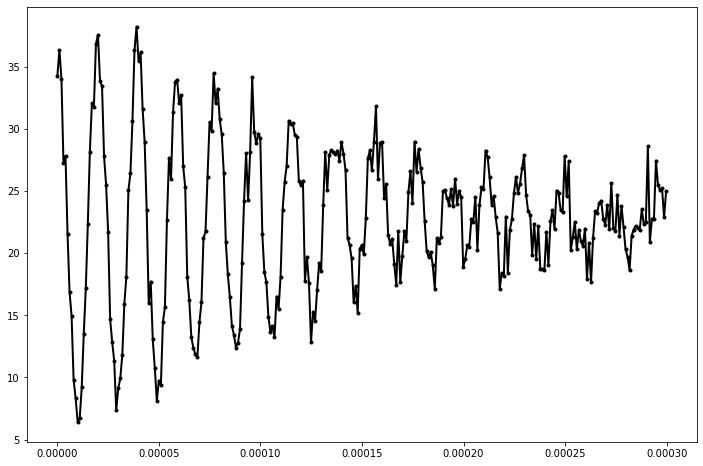

In [3]:
fsamp = 1001001.0010010009
t = np.arange(0, 301/fsamp, 1/fsamp)

escala = 2.1969696969696972
offset = 105.75757575757576

promedios = np.mean(data, axis=1)

fig, ax = plt.subplots(1, figsize=(12,8))
ax.plot(t, (promedios-offset)/escala, ".-k", linewidth=2)
plt.show()

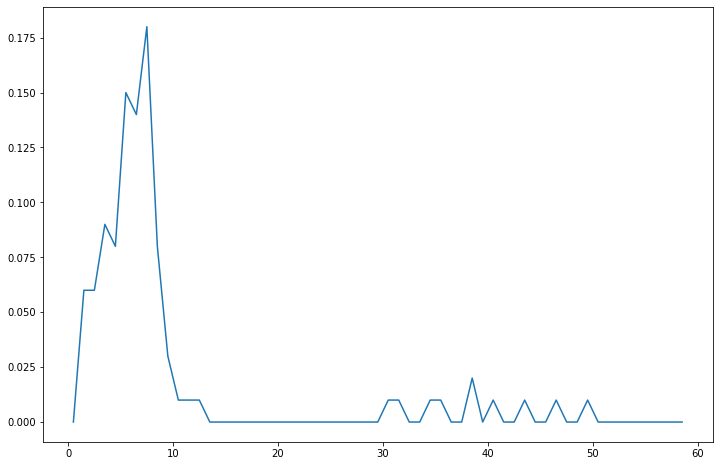

In [4]:
plt.figure(figsize=(12,8))
for index, fila in enumerate(data):
    fila = (fila - offset)/escala
    
    hist, bin_edges = np.histogram(fila, bins=np.arange(0,60,1,dtype=int), density=True)
    x = bin_edges[:-1]+0.5
    
    
    if index == 12:
        plt.plot(x, hist, '-')
        break


In [5]:
print((data[0,:] - offset)/escala)

data = (data - offset)/escala

[45.2862069  39.25517241 39.02758621 25.94137931 42.55517241 37.43448276
 32.2        34.13448276 45.2862069  39.71034483 30.03793103 34.58965517
 26.28275862 41.30344828 30.60689655 32.76896552 36.06896552 25.82758621
 31.63103448 33.56551724 37.20689655 37.66206897 37.32068966 39.14137931
 33.67931034 31.63103448 20.25172414 42.66896552 36.06896552 42.66896552
 43.69310345 26.05517241 25.7137931  27.42068966 32.54137931 32.76896552
 37.43448276 37.09310345 32.99655172 32.54137931 31.40344828 29.92413793
 26.16896552 22.98275862 38.6862069  42.1        46.42413793 34.24827586
 28.33103448 49.49655172 38.00344828 43.69310345 42.78275862 27.19310345
 37.88965517 26.51034483 28.7862069  33.90689655 33.22413793 36.97931034
 31.28965517 25.4862069  37.66206897 35.27241379 33.22413793 39.36896552
 35.95517241 32.42758621 40.16551724 36.06896552 38.34482759 28.33103448
 28.55862069 30.15172414 30.49310345 46.19655172 33.22413793 40.62068966
 30.26551724 35.27241379 35.5        31.85862069 29

Queremos representar el primer gráfico (oscilaciones de Rabi) en una probabilidad de que el ión esté prendido o esté apagado. 
Para conseguir esto como una primera aproximación, lo que podemos hacer es tomar un threshhold a ojo, por ejemplo n° de fotones = 20 como se ve en la imagen

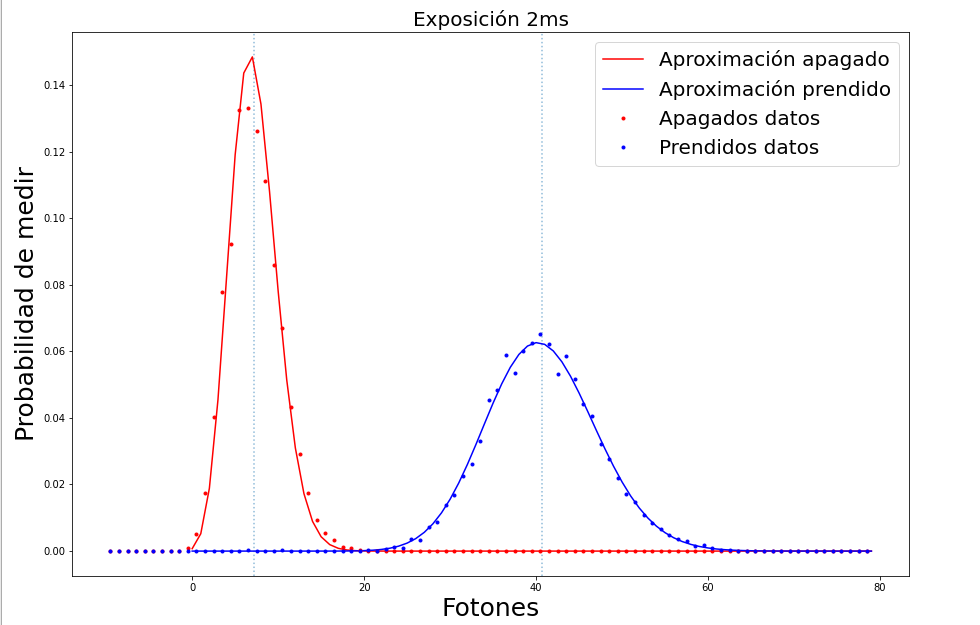

Entonces lo que podemos hacer es: para cada fila(100 mediciones) de la matriz datos, contamos la cantidad de mediciones con cantidad de fotones $n_p > 20$ como los fotones prendidos y lo dividimos por la cantitdad total de mediciones $n$, que en este caso es 100. En ese caso queda que $n_a = n - n_p$ y entonces la probabilidad de que esté prendido el ión es $P_p = n_p/n$ y entonces $P_a = 1 - P_p$.

In [6]:
data_binaria = np.where(data > 20, 1, 0)

print(data_binaria[0,:])

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1]


Para calcular los errores de cada medición usamos una fórmula para el intervalo de confianza que vimos en https://www.youtube.com/watch?v=hlM7zdf7zwU. Esta fórmula es
$$\sigma = \sqrt{\frac{p ( 1-p)}{n}}$$

In [7]:
probabilidades = np.sum(data_binaria/len(data_binaria[0,:]), axis=1)

stds = np.sqrt(probabilidades * (1 - probabilidades)/100)

print(data_binaria)
print(probabilidades, len(probabilidades))
print(stds)

[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [1 1 1 ... 1 1 0]
 [0 1 0 ... 1 1 1]
 [0 1 0 ... 1 1 0]]
[0.98 0.97 0.91 0.67 0.67 0.48 0.35 0.28 0.12 0.06 0.01 0.04 0.1  0.22
 0.33 0.51 0.7  0.81 0.83 0.97 0.97 0.88 0.86 0.69 0.62 0.52 0.27 0.22
 0.15 0.03 0.09 0.11 0.19 0.29 0.38 0.58 0.63 0.75 0.87 0.96 0.9  0.89
 0.77 0.68 0.57 0.32 0.36 0.21 0.14 0.04 0.11 0.1  0.26 0.29 0.5  0.68
 0.61 0.76 0.81 0.82 0.81 0.82 0.63 0.59 0.37 0.32 0.23 0.17 0.15 0.16
 0.22 0.29 0.44 0.46 0.6  0.74 0.74 0.85 0.8  0.82 0.76 0.68 0.61 0.46
 0.35 0.3  0.22 0.19 0.21 0.22 0.26 0.37 0.55 0.65 0.57 0.69 0.82 0.71
 0.67 0.68 0.67 0.45 0.35 0.35 0.26 0.22 0.24 0.21 0.29 0.28 0.35 0.52
 0.57 0.63 0.74 0.72 0.75 0.69 0.69 0.56 0.57 0.6  0.35 0.38 0.36 0.19
 0.25 0.23 0.31 0.38 0.4  0.53 0.67 0.56 0.63 0.66 0.67 0.64 0.66 0.64
 0.68 0.64 0.6  0.44 0.4  0.41 0.3  0.31 0.27 0.44 0.41 0.41 0.52 0.66
 0.66 0.61 0.65 0.74 0.6  0.67 0.67 0.54 0.57 0.47 0.41 0.42 0.39 0.33
 0.45 0.34 0.42 0.46 0.44 0.

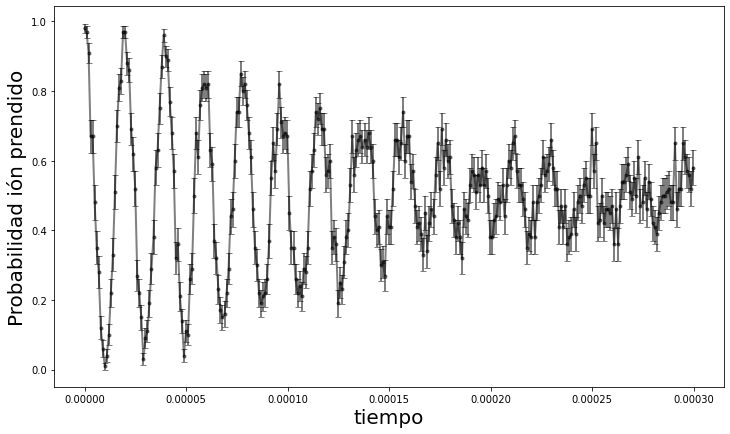

In [8]:
plt.figure(figsize=(12,7))

plt.errorbar(t, probabilidades, fmt=".-k",yerr=stds, capsize=3, alpha=0.5,linewidth=2)
plt.ylabel("Probabilidad ión prendido", fontsize=20)
plt.xlabel("tiempo", fontsize=20)
plt.show()

Segun Christian tenemos que usar las siguientes ecuaciones para fitear las oscilaciones de Rabi usando el $\Omega_{n,n}$ en vez de $\Omega_{n,n+1}$

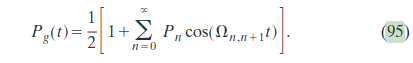

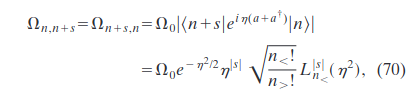

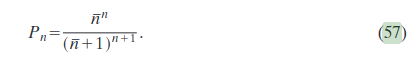

Según lo que leí y "entendí" del paper https://www.quantumoptics.at/images/publications/papers/rmp03_blatt.pdf, las aproximaciones que se tienen en cuenta para llegar a que la probabilidad es la que se muestra en la ecuación 95 son:
$$\eta << 1 \implies  \eta^n \approx 0 \quad \forall n > 1,$$
$$s = 0.$$

Hay que tener en cuenta que los polinomios generalizados de Laguerre $L_n^\alpha(X)$ estan dados por

$$L_n^\alpha(X) = \sum_{m=0}^{n} (-1)^m {n+\alpha \choose n-m} \frac{X^m}{m!}$$

Si uso estas aproximaciones, la ecuación 70 con $s=\alpha = 0$ queda
$$\Omega_{n,n} = \Omega_0 e^{-\eta^2/2} \sum_{m=0}^n (-1)^m {n \choose n-m} \frac{\eta^{2m}}{m!}$$

Y con esto la probabilidad queda

$$P(t) = \frac{1}{2} \left[ 1 + \sum_{n=0}^{\infty} \frac{\bar{n}^{n}}{\left(\bar{n}+1\right)^{n+1}} \cos{\left( \Omega_0 e^{-\eta^2/2} \sum_{m=0}^n (-1)^m {n \choose n-m} \frac{\eta^{2m}}{m!} t \right)} \right]$$


Además, según la ecuación 55 del paper, la temperatura está dada por

$$T = \frac{\hbar \nu}{k_B ln\left(\frac{\bar{n} + 1}{\bar{n}}\right)},$$

Por lo que 

$$\frac{\bar{n}}{\left(\bar{n}+1\right)} = e^{-\frac{\hbar \nu}{k_B T}}$$

y entonces

$$\bar{n} = \frac{1}{e^{\frac{\hbar \nu}{k_B T}} - 1}$$

Por lo que los coeficientes de la serie de cosenos quedan

$$P_n = e^{-n\frac{\hbar \nu}{k_B T}} \left(1 - e^{-\frac{\hbar \nu}{k_B T}}\right) = 2e^{-\frac{\hbar \nu}{k_B T}(n+ \frac{1}{2})} \sinh{\left(\frac{\hbar \nu}{2k_B T}\right)}$$

Voy a tomar como parámetros a fittear a $A=T$ y $B=\Omega_0$ en la ecuación

$$P(t) = \frac{1}{2} \left[ 1 + \sum_{n=0}^{\infty} 2e^{-\frac{\hbar \nu}{k_B A} (n + \frac{1}{2})} \sinh{\left(\frac{\hbar \nu}{2 k_B A}\right)} \cos{\left( B \cdot t \cdot e^{-\eta^2/2} \sum_{m=0}^n (-1)^m {n \choose n-m} \frac{\eta^{2m}}{m!} \right)} \right]$$

Y voy a usar lo que dijo Christian sobre que $\nu \approx 1Mhz$ y los valores en wikipedia de $\hbar \approx 1.054 \mathrm{e}{-34} Js$ y  $k_B = 1.381e-23 J/K$.

Si no funciona, otra cosa que podemos hacer es usar como parámetro $A=\bar{n}$

$$P(t) = \frac{1}{2} \left[ 1 + \sum_{n=0}^{\infty} \frac{A^n}{(A+1)^{n+1}} \cos{\left( B \cdot t \cdot e^{-\eta^2/2} \sum_{m=0}^n (-1)^m {n \choose n-m} \frac{\eta^{2m}}{m!} \right)} \right]$$


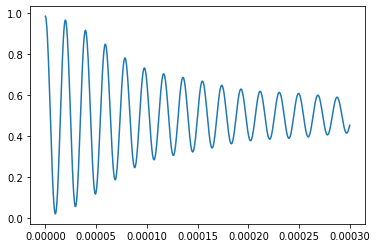

In [66]:
def prob_fit(t, A, B):
    n_max = 40
    eta = 0.07
    hbar = 1.054e-34 #J*s
    kb = 1.381e-23 #J/K
    nu = 1e6 #Hz
    hbar_nu_kb = hbar * nu / kb
    
    primer_termino =  1
    
    segundo_termino = 0
    
    for n in range(n_max):
        P_n = A**n / (A+1)**(n+1)
        
        pol_laguerre = genlaguerre(n, 0)(eta**2)
        segundo_termino += P_n * np.cos(B * np.exp(-eta**2/2) * pol_laguerre * t)
    
    return (primer_termino + segundo_termino)/2

tiempos_plot = np.linspace(min(t), max(t), 1000)

plt.plot(tiempos_plot, prob_fit(tiempos_plot, 1.11502539e+01, 3.32938701e+05))

#Frec aprox de la osc en Hz es 1.81250224e+07 Hz

In [68]:
param, pcov = curve_fit(prob_fit, t, probabilidades, p0=[ 0.1, 314000])

print(param)

[1.11502539e+01 3.32938701e+05]


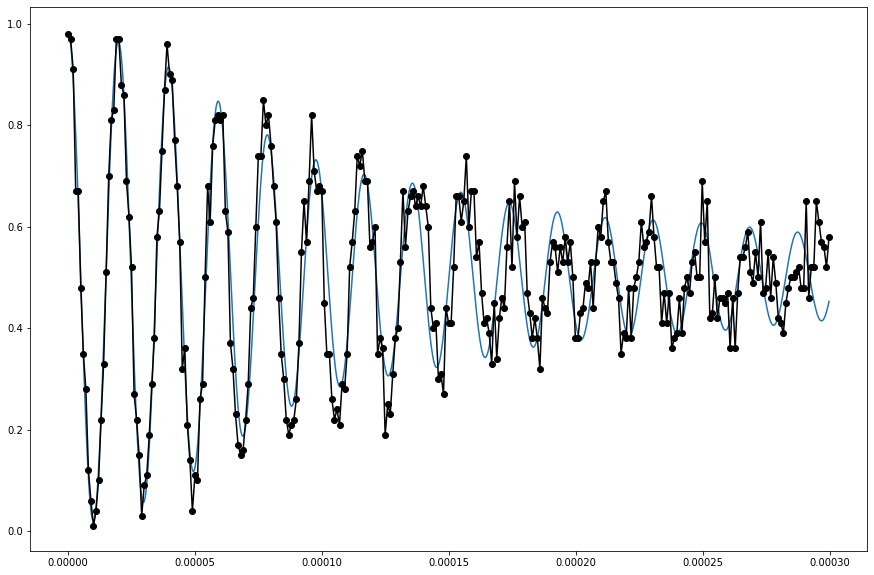

In [69]:
fig, ax = plt.subplots(1, figsize=(15,10))

tiempos_plot = np.linspace(min(t), max(t), 1000)

ax.plot(tiempos_plot, prob_fit(tiempos_plot, *param))

ax.plot(t, probabilidades, 'o-k')
plt.show()

Entonces conseguimos que los parámetros son:

$$B = \Omega_0 = 3.33e+05 Hz$$
$$A = \bar{n} = 1.115e+01$$

Entonces si usamos la ecuación 55 del paper y los valores $\nu \approx 1Mhz$, $\hbar \approx 1.054 \mathrm{e}{-34} Js$, $T(\bar{n})$ y $k_B = 1.381e-23 J/K$ queda

$$T = \frac{\hbar \nu}{k_B ln\left(\frac{\bar{n} + 1}{\bar{n}}\right)},$$

queda

In [81]:
import pint

un = pint.UnitRegistry()

print(un.hbar, un.K)

hbar = 1.054e-34 * un.joules * un.second
kb = 1.381e-23 * un.joules / un.kelvin
nu = 1e6 * un.hertz
nbar = param[0]
T = hbar * nu / (kb * np.log((nbar + 1)/nbar))
print(T.to(un.kelvin))

dirac_constant kelvin
8.886187320091116e-05 kelvin
